<a href="https://colab.research.google.com/github/jitbnerejee4/jit/blob/fastai/duplicate_image_remover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 130kB/s 
ERROR: tensorflow 2.2.0rc2 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [0]:
import hashlib
from scipy.misc import imread, imresize, imshow
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import time
import numpy as np

In [0]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

In [14]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'handwritten/' + 'bengali_poems/'

Mounted at /content/gdrive


In [0]:
import os

In [16]:
os.getcwd()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-a78b1fb2bab9>", line 1, in <module>
    os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb

OSError: ignored

In [17]:
base_dir

'/content/gdrive/My Drive/handwritten/bengali_poems/'

In [18]:
os.chdir(base_dir)
os.getcwd()

'/content/gdrive/My Drive/handwritten/bengali_poems'

In [19]:
file_list = os.listdir()
print(len(file_list))

366


In [0]:

import hashlib, os
duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))

In [21]:
duplicates

[(43, 15),
 (58, 29),
 (67, 44),
 (70, 69),
 (78, 77),
 (82, 80),
 (83, 79),
 (84, 81),
 (85, 54),
 (91, 41),
 (92, 28),
 (93, 26),
 (94, 57),
 (136, 111),
 (152, 124),
 (164, 134),
 (188, 166),
 (208, 139),
 (211, 196),
 (246, 213),
 (248, 219),
 (249, 108),
 (250, 217),
 (251, 221),
 (253, 235),
 (254, 202),
 (255, 218),
 (262, 170),
 (271, 247),
 (273, 256),
 (278, 242),
 (280, 167),
 (285, 205),
 (286, 98),
 (287, 128),
 (288, 239),
 (290, 109),
 (295, 170),
 (296, 269),
 (297, 252),
 (298, 267),
 (299, 107),
 (300, 238),
 (303, 263),
 (304, 233),
 (305, 276),
 (306, 292),
 (308, 283),
 (309, 156),
 (310, 281),
 (320, 317),
 (331, 324),
 (340, 339),
 (345, 327),
 (347, 332),
 (351, 348),
 (352, 313),
 (358, 355),
 (361, 314)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


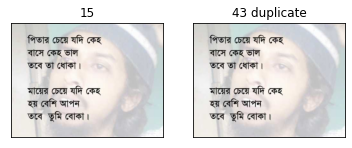

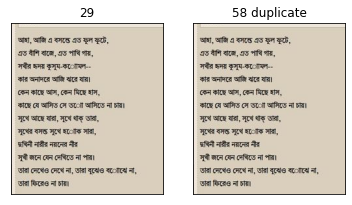

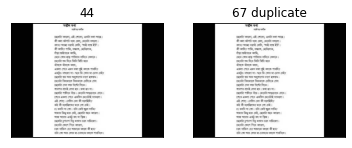

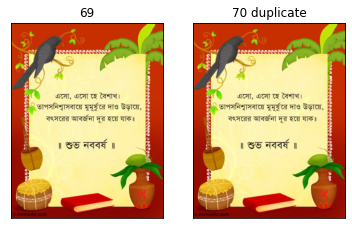

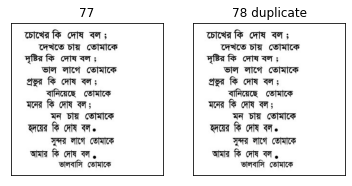

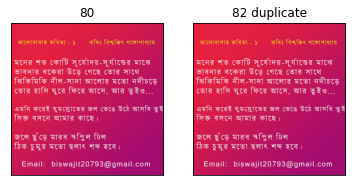

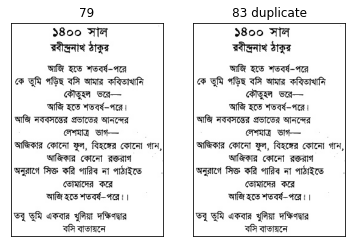

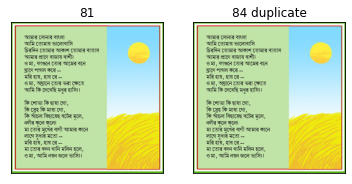

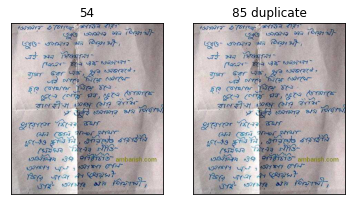

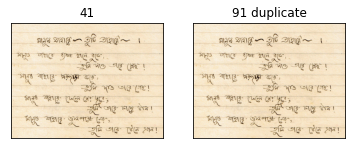

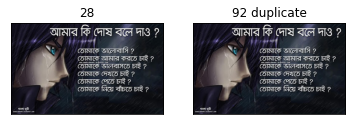

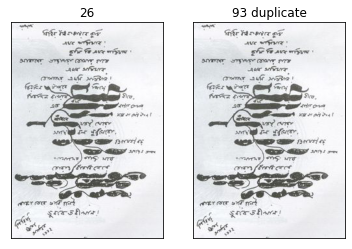

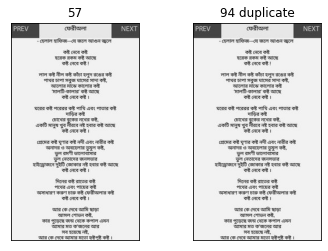

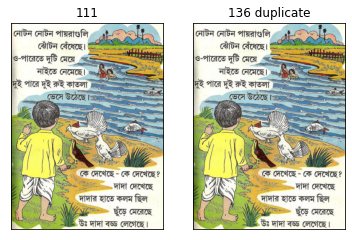

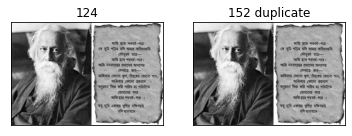

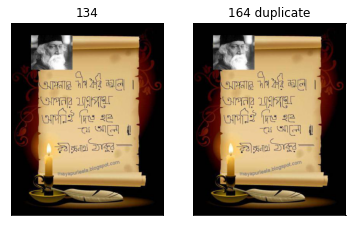

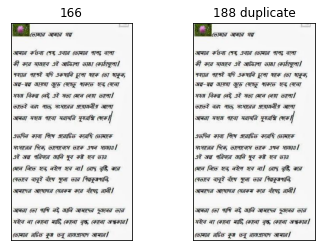

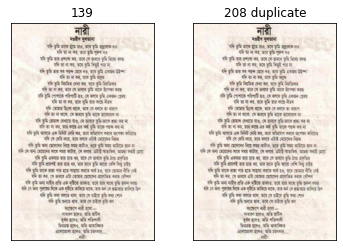

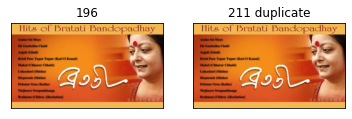

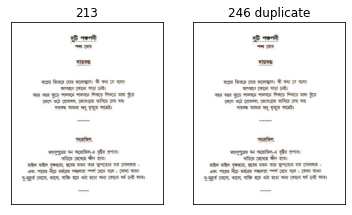

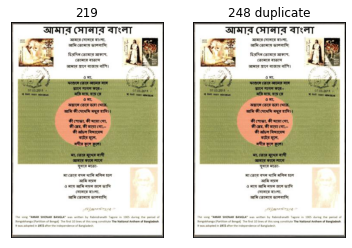

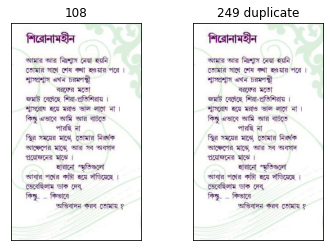

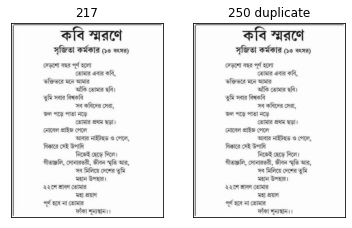

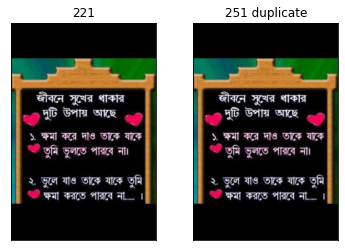

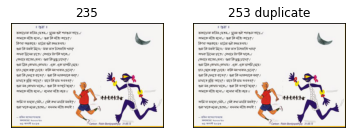

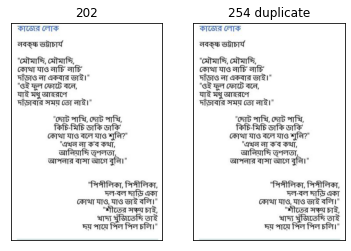

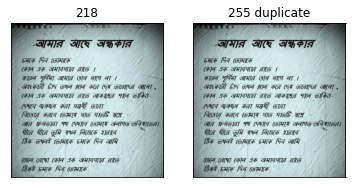

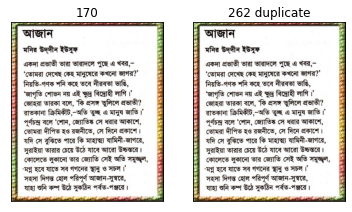

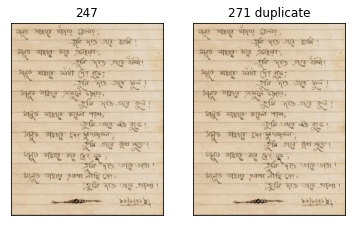

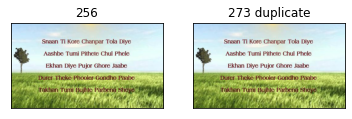

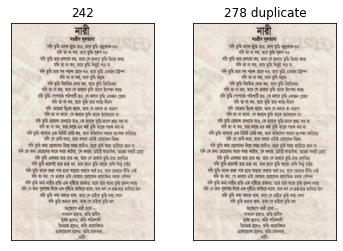

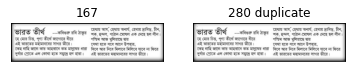

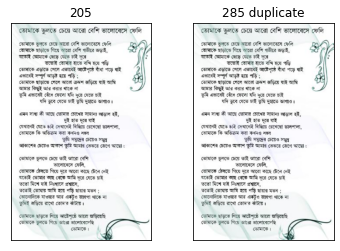

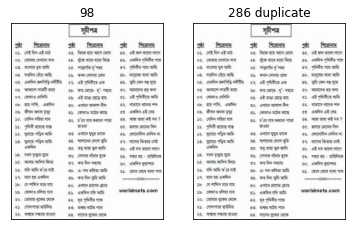

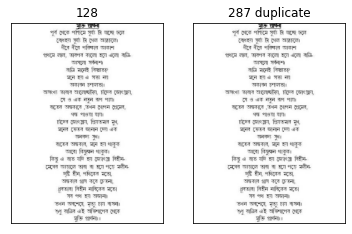

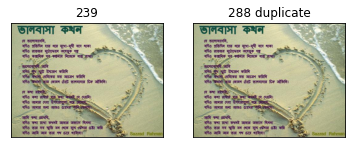

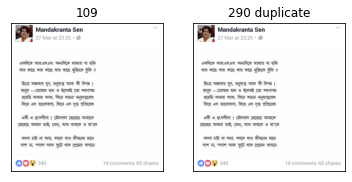

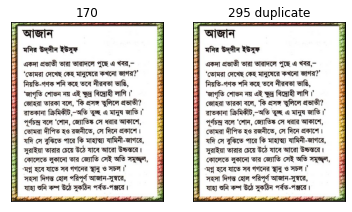

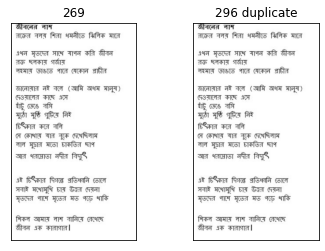

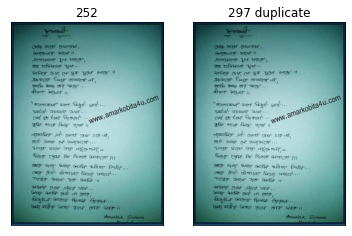

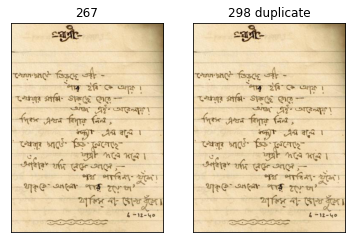

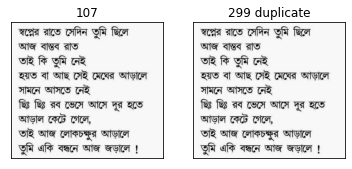

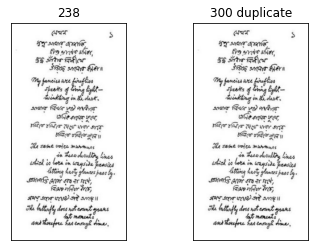

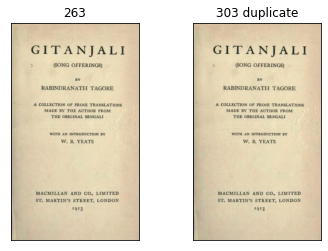

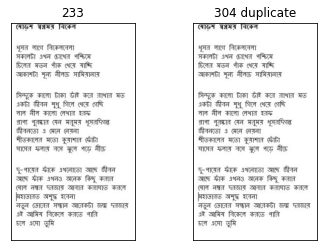

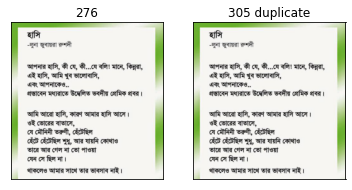

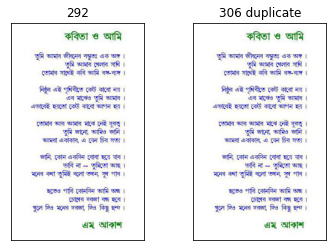

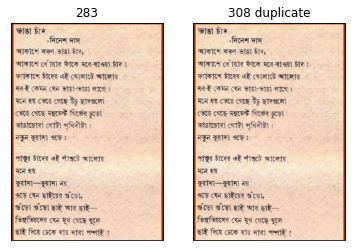

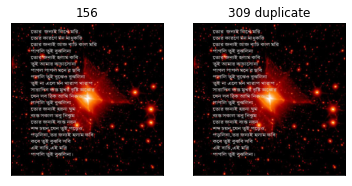

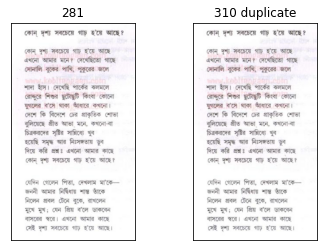

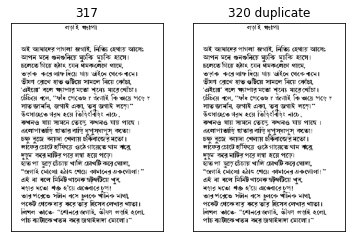

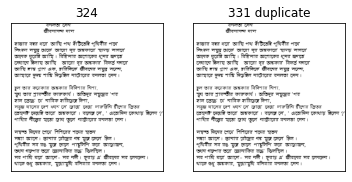

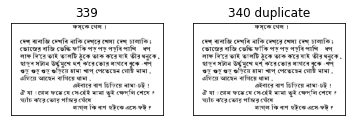

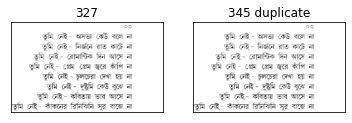

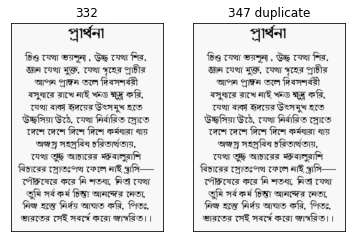

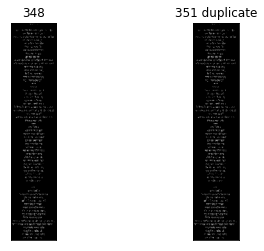

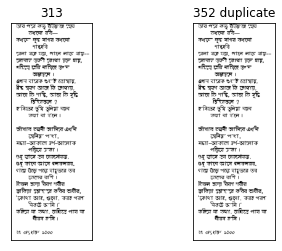

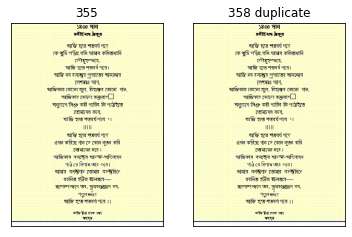

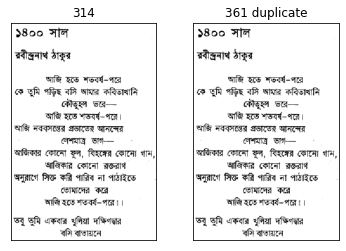

In [22]:
for file_indexes in duplicates[:500]:
    try:
    
        plt.subplot(121),plt.imshow(imread(file_list[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(file_list[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [0]:
for index in duplicates:
    os.remove(file_list[index[0]])